## ARIMA 모델 : 자기상관과 이동평균을 수식화

- ARMA는 정상성 시계열에 한한 모델
- 비정상성 데이터를 정상화 하는 단계 => ARIMA

### arima(p, d, q)
- p : AR모델의 차수
- d : 비정상성 시계열을 정상성 시계열로 변환하기 위한 차분 차수
- q : 이동평균 차수

### ARIMA(p, d, q)를 d번 차분 => ARMA(p, q)

## 자기회귀 모델 (AR) : 독립변수와 종속변수를 모두 자기 자신 데이터의 상관관계를 분석하여 회귀 모델을 세우는 모델

- **AR(p)모델은 자기상관 관계가 lag p까지 영향을 미치는 모델, 회귀 계수가 p개 존재**


### ```tseries::arima.sim()``` : ARIMA 모델에 따른 랜덤 데이터 생성
- ```model``` 생성할 모형 (p, d, q), AR회귀 계수 ```list(order = c(p, d, q), ar = alpha)```
- ```n``` : 생성할 데이터 크기

In [82]:
library(tseries)

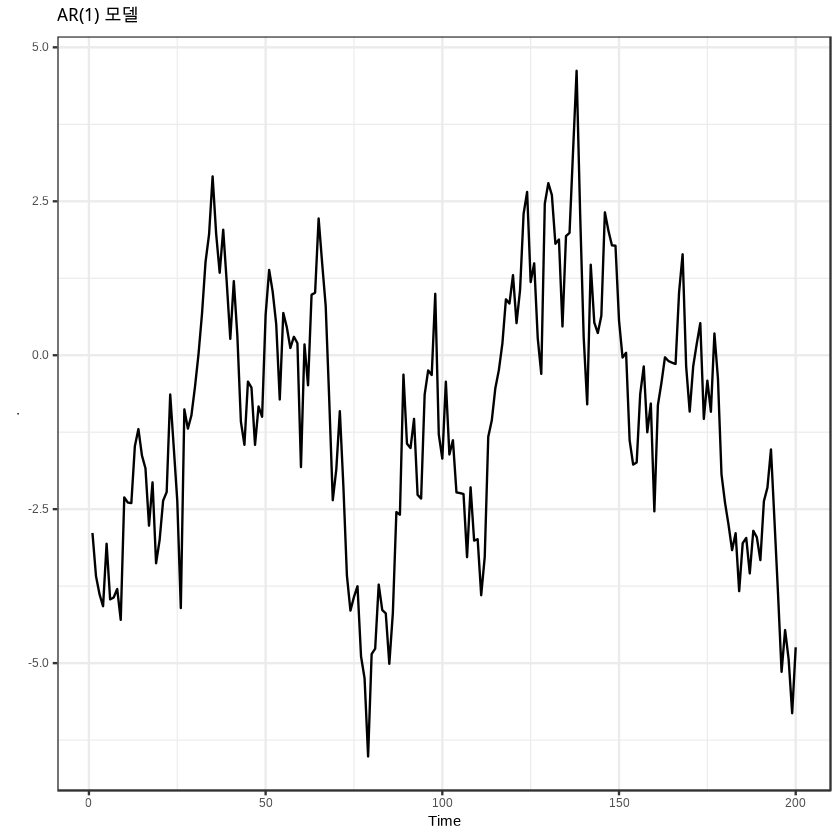

In [84]:
set.seed(345)
arima100 <- arima.sim(model = list(order = c(1, 0, 0), ar = 0.9), n = 200)
arima100 %>% autoplot(main = 'AR(1) 모델')

#### 정상성 만족

In [85]:
urca::ur.kpss(arima100) %>% urca::summary()
ndiffs(arima100, test = 'kpss')


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 4 lags. 

Value of test-statistic is: 0.2684 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


[1] 0

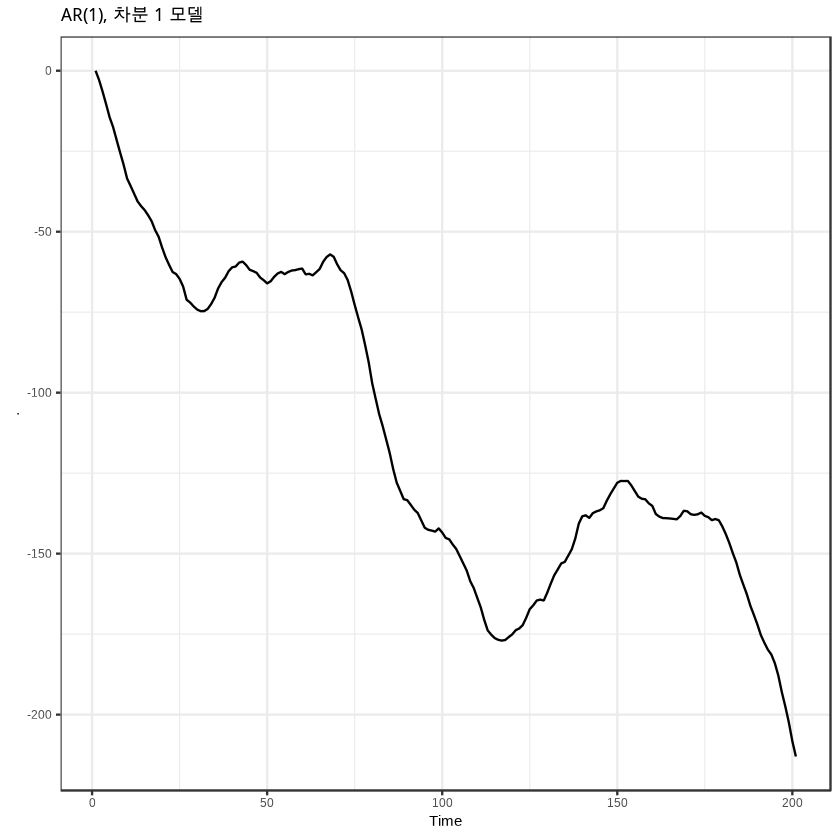

In [86]:
set.seed(345)
arima110 <- arima.sim(model = list(order = c(1, 1, 0), ar = 0.9), n = 200)
arima110 %>% autoplot(main = 'AR(1), 차분 1 모델')

In [87]:
urca::ur.kpss(arima110) %>% urca::summary()
ndiffs(arima110, test = 'kpss')


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 4 lags. 

Value of test-statistic is: 3.2912 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


[1] 1

In [88]:
urca::ur.kpss(diff(arima110)) %>% urca::summary()
ndiffs(diff(arima110), test = 'kpss')


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 4 lags. 

Value of test-statistic is: 0.2684 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


[1] 0

#### ARIMA모델의 ACF, PACF 플롯

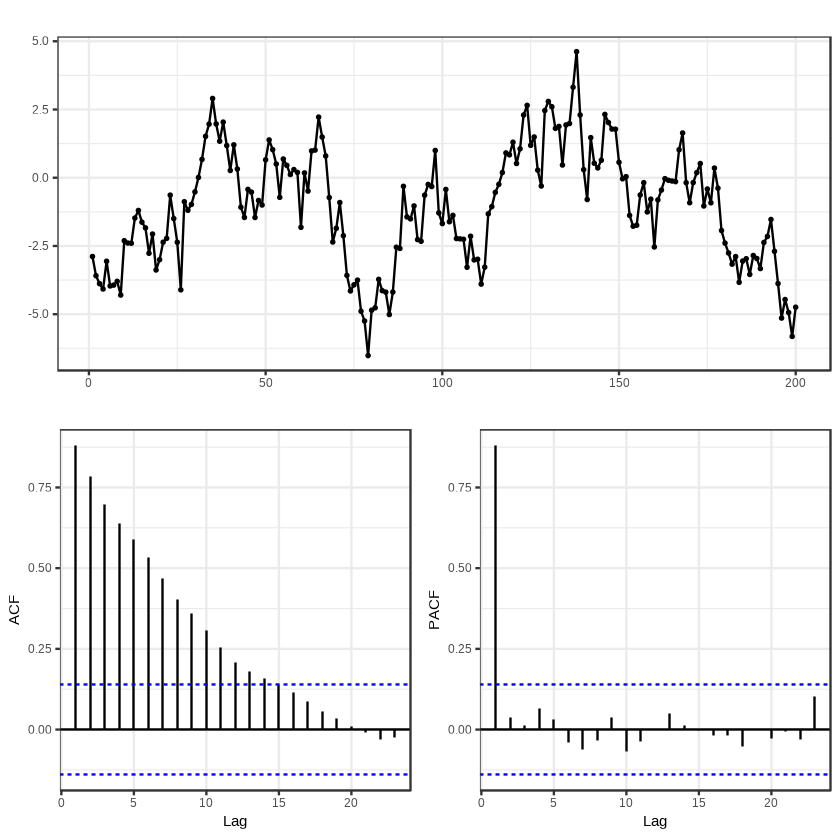

In [89]:
arima100 %>% ggtsdisplay()

## 이동평균 모델 (MA) : 시계열 데이터에 대한 전체 평균이 아닌 특정 기간 간의 평균을 지속해서 계산

- MA(q) : q만큼의 기간을 이동평균 산출
- q가 1이면 기준 시점값과 바로 이전값의 평균

### ARIMA 모델에서 이동평균을 사용할 때, 이동평균 모델의 계수를 적용하는 독립변수는 오차항

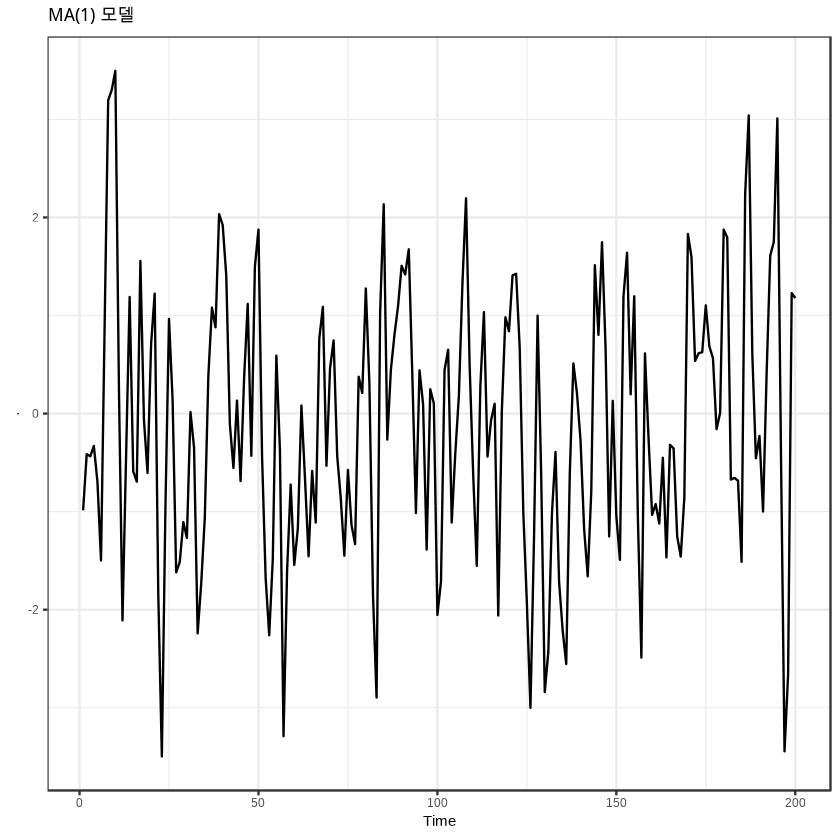

In [90]:
set.seed(345)

# ARIMA(0,0,1)에 MA(1)의 회귀 계수가 0.9인 데이터 200개 생성
arima001 <- arima.sim(model = list(order = c(0, 0, 1), ma = 0.9), n = 200)

arima001 %>% autoplot(main = 'MA(1) 모델')

In [92]:
# kpss 테스트를 통해 생성된 데이터가 정상성인지 테스트 - 0.05보다 크므로 정상성, 차분 불필요
urca::ur.kpss(arima001) %>% urca::summary()


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 4 lags. 

Value of test-statistic is: 0.0906 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


In [93]:
# 비정상 제거를 위한 차분수 - 0이 나오므로 차분 불필요
ndiffs(arima001, test = 'kpss')

[1] 0

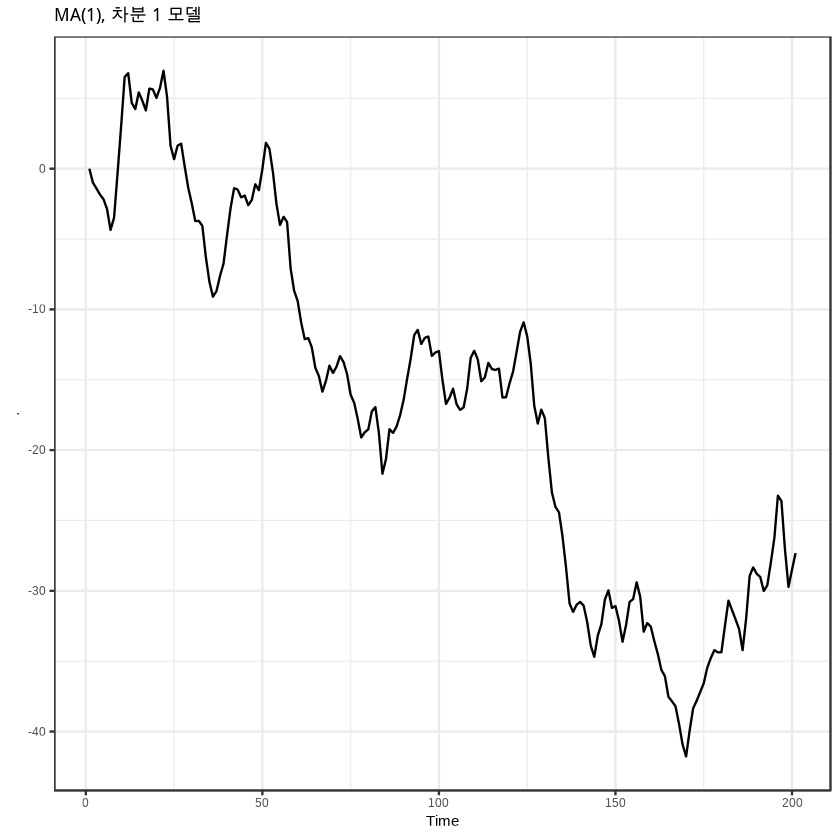

In [94]:
set.seed(345)
arima011 <- arima.sim(model = list(order = c(0, 1, 1), ma = 0.9), n = 200)
arima011 %>% autoplot(main = 'MA(1), 차분 1 모델')

In [95]:
# kpss 테스트를 통해 생성된 데이터가 정상성인지 테스트 - 0.05보다 작으므로 정상성, 차분 필요
urca::ur.kpss(arima011) %>% urca::summary()


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 4 lags. 

Value of test-statistic is: 3.5785 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


In [96]:
# 비정상성을 제거하기 위해 필요한 차분수
ndiffs(arima011, test = 'kpss')

[1] 1

In [97]:
urca::ur.kpss(diff(arima011)) %>% urca::summary()
ndiffs(diff(arima011), test = 'kpss')


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 4 lags. 

Value of test-statistic is: 0.0906 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


[1] 0

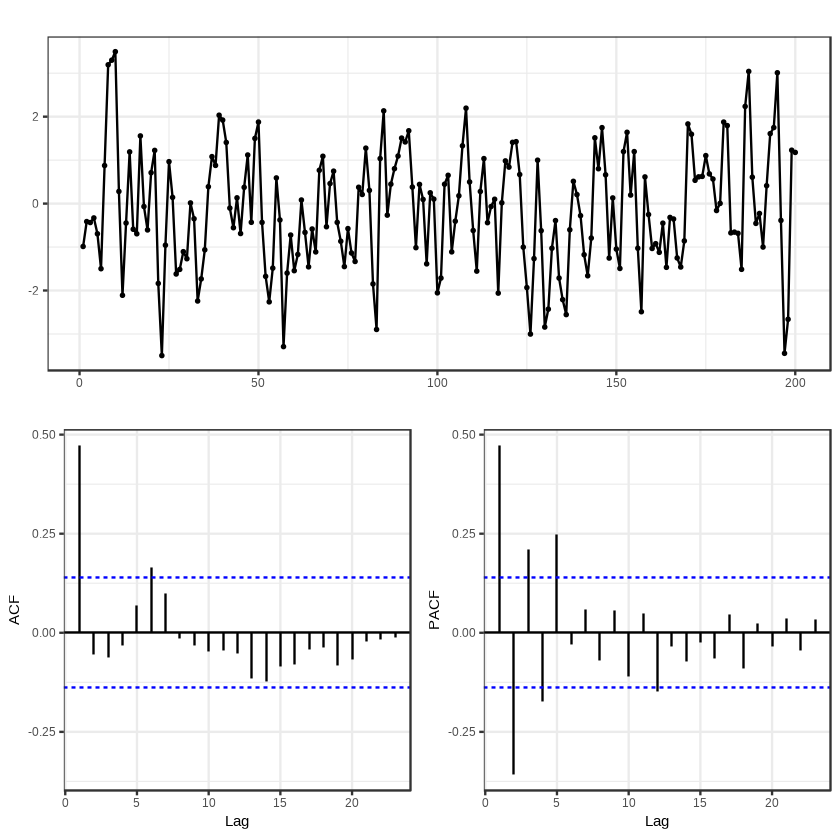

In [98]:
arima001 %>% ggtsdisplay()

## ARIMA 모델 결정
- 차수를 결정하는 방법은 ACF와 PACF로 판단

### 1. 차분을 통한 정상화
* ```ur.kpss()```를 사용하여 검정통계량이 5% 임계치 보다 크면 비정상 시계열, ```ndiffs()```를 사용하여 차분수를 구함
* 차분수만큼 차분한 데이터 생성

### 2. ACF, PACF를 확인
* ACF가 점차 감소, PACF의 p차에서 절단값이 있다면 AR(p)
* PACF가 점차 감소이고 ACF가 q차에서 절단값이 있다면 MA(q)
* ACF와 PACF가 모두 점차 감소라면 ARMA 모델


| | AR(p) | MA(q) | ARMA(p, q) |
| -- | -- | -- | -- |
| ACF | 점차 감소 | q차에서 절단 | 점차 감소 |
| PACF | p차에서 절단 | 점차 감소 | 점차 감소 |

### - p와 q가 모두 0보다 큰 경우는 AIC, BIC, RMSE등의 metric으로 좋은 모델 선정

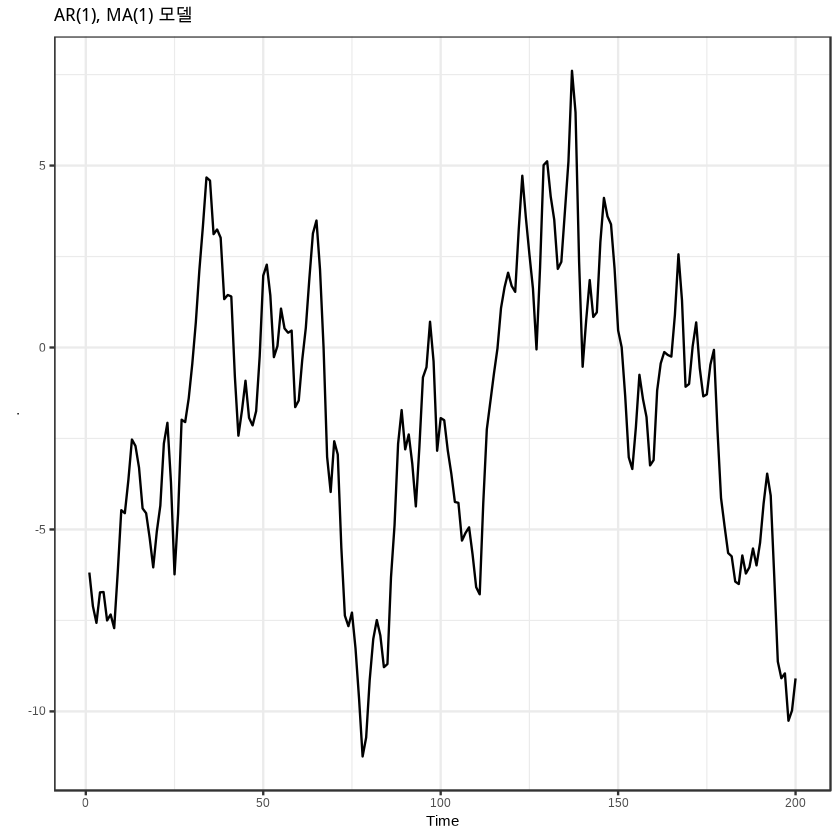

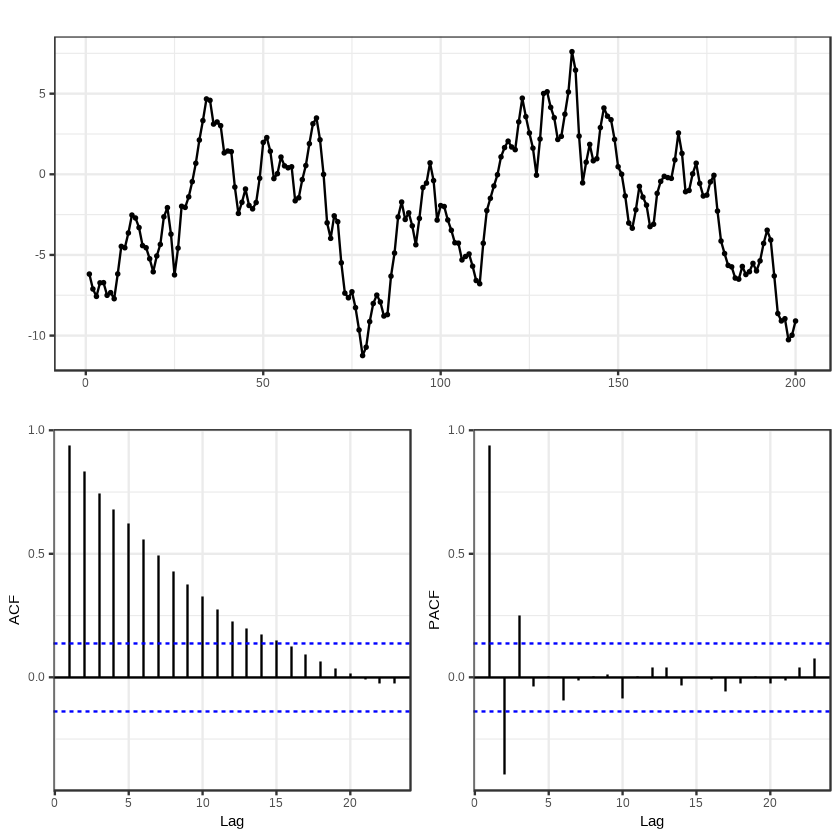

In [100]:
set.seed(345)

# ARIMA(1,0,0)에 AR(1)의 회귀 계수가 0.9인 데이터 200개 생성
arima101 <- arima.sim(model = list(order = c(1, 0, 1), ar = 0.9, ma = 0.9), n = 200)

arima101 %>% autoplot(main = 'AR(1), MA(1) 모델')

arima101 %>% ggtsdisplay()

### 3. 잔차를 확인
- 결정한 모델을 통해 생성된 잔차가 백색잡음인지 확인
- 모델이 생성한 잔차가 백색잡음인지를 검사하기 위해 Ljung-box test 시행

### ```astsa::sarima()``` : ARIMA 모델의 잔차를 검사

In [102]:
library(astsa)

initial  value 1.359489 
iter   2 value -0.018418
iter   3 value -0.028037
iter   4 value -0.028204
iter   5 value -0.028466
iter   6 value -0.028483
iter   7 value -0.028509
iter   8 value -0.028558
iter   9 value -0.028579
iter  10 value -0.028582
iter  11 value -0.028593
iter  12 value -0.028606
iter  13 value -0.028620
iter  14 value -0.028666
iter  15 value -0.028698
iter  16 value -0.028709
iter  17 value -0.028710
iter  18 value -0.028710
iter  19 value -0.028711
iter  20 value -0.028713
iter  21 value -0.028715
iter  22 value -0.028717
iter  23 value -0.028717
iter  24 value -0.028717
iter  25 value -0.028717
iter  26 value -0.028717
iter  27 value -0.028717
iter  28 value -0.028717
iter  29 value -0.028717
iter  29 value -0.028717
final  value -0.028717 
converged
initial  value -0.024032 
iter   2 value -0.024200
iter   3 value -0.024313
iter   4 value -0.024363
iter   5 value -0.024425
iter   6 value -0.024425
iter   7 value -0.024425
iter   8 value -0.024425
iter   9 value 

$fit

Call:
arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, Q), period = S), 
    xreg = xmean, include.mean = FALSE, transform.pars = trans, fixed = fixed, 
    optim.control = list(trace = trc, REPORT = 1, reltol = tol))

Coefficients:
         ar1     ma1    xmean
      0.8943  0.8966  -2.4748
s.e.  0.0320  0.0399   1.1803

sigma^2 estimated as 0.9315:  log likelihood = -278.9,  aic = 565.81

$degrees_of_freedom
[1] 197

$ttable
      Estimate     SE t.value p.value
ar1     0.8943 0.0320 27.9324  0.0000
ma1     0.8966 0.0399 22.4571  0.0000
xmean  -2.4748 1.1803 -2.0968  0.0373

$AIC
[1] 2.829026

$AICc
[1] 2.829638

$BIC
[1] 2.894992


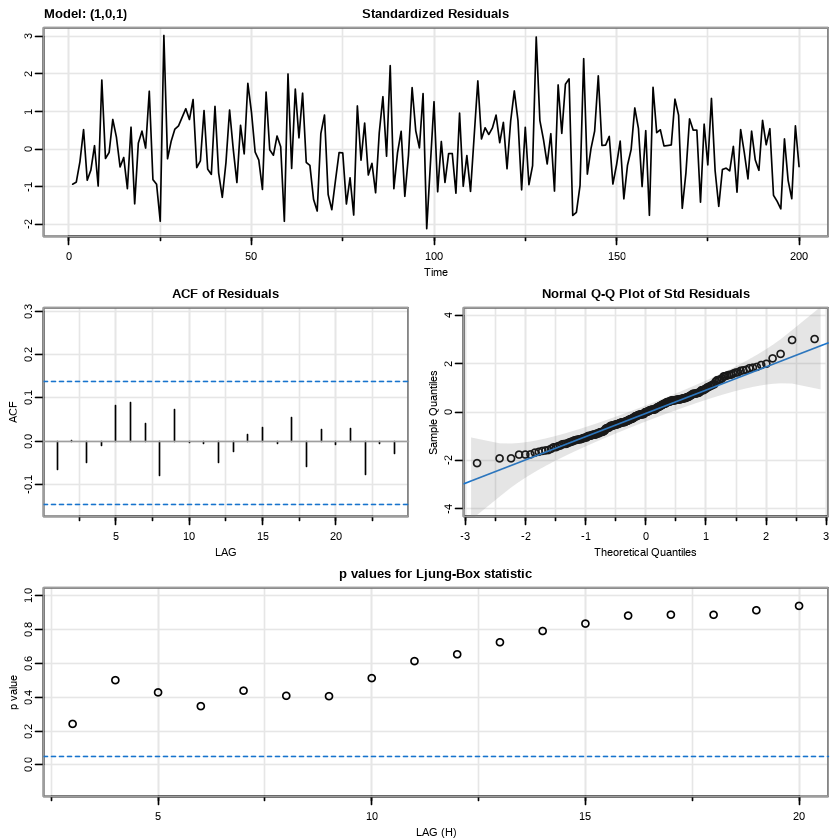

In [107]:
sarima(arima101, p = 1, d = 0, q = 1)

#### 상단 : 표준화 잔차 플롯 (잔차의 분포)
#### 두 번째 열 왼쪽의 잔차 ACF 플롯 : 잔차의 자기상관
#### 두 번째 열 오른쪽 Q-Q플롯 : 잔차의 정규분포 여부
#### 하단 : Ljung-Box의 p-value 플롯 (모든 lag의 p-value가 95% 임계선 위쪽으로 나타나야 백색잡음으로 간주)

### ARIMA 모델1

### ```forecast::auto.arima()``` : 자동으로 ARIMA 모델을 결정
- AIC가 작은 모델을 선정
- AIC가 높을 수록 모형의 적합도가 떨어짐을 의미 (낮을수록 좋음)

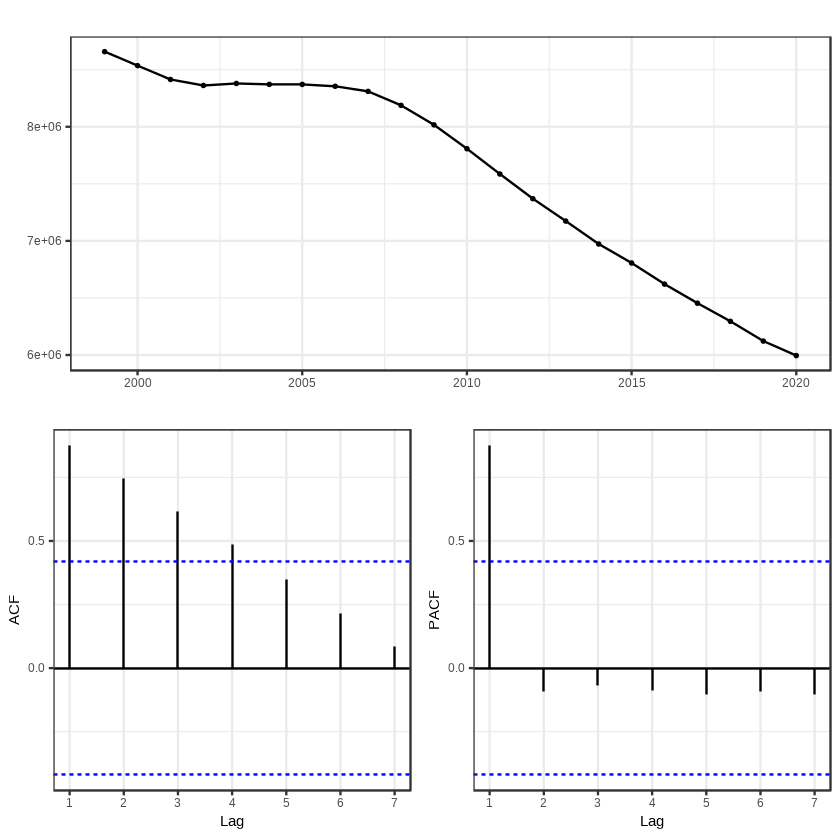

In [108]:
students.ts[,2] %>% ggtsdisplay()

- ACF가 점차감소, PACF가 1차 lag에서 절단 => **ARMA(1, 0)**

In [110]:
urca::ur.kpss(students.ts[,2]) %>% urca::summary()
ndiffs(students.ts[,2], test = 'kpss')


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 2 lags. 

Value of test-statistic is: 0.7939 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


[1] 2

- **정상성 만족X, 차분 2회 필요 => ARIMA(1, 2, 0)**

initial  value 10.520394 
iter   2 value 10.438482
iter   3 value 10.437906
iter   4 value 10.437883
iter   4 value 10.437883
final  value 10.437883 
converged
initial  value 10.416785 
iter   2 value 10.416539
iter   3 value 10.416530
iter   3 value 10.416530
iter   3 value 10.416530
final  value 10.416530 
converged


$fit

Call:
arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, Q), period = S), 
    include.mean = !no.constant, transform.pars = trans, fixed = fixed, optim.control = list(trace = trc, 
        REPORT = 1, reltol = tol))

Coefficients:
         ar1
      0.3861
s.e.  0.2075

sigma^2 estimated as 1.107e+09:  log likelihood = -236.71,  aic = 477.42

$degrees_of_freedom
[1] 19

$ttable
    Estimate     SE t.value p.value
ar1   0.3861 0.2075  1.8609  0.0783

$AIC
[1] 23.87094

$AICc
[1] 23.88205

$BIC
[1] 23.97051


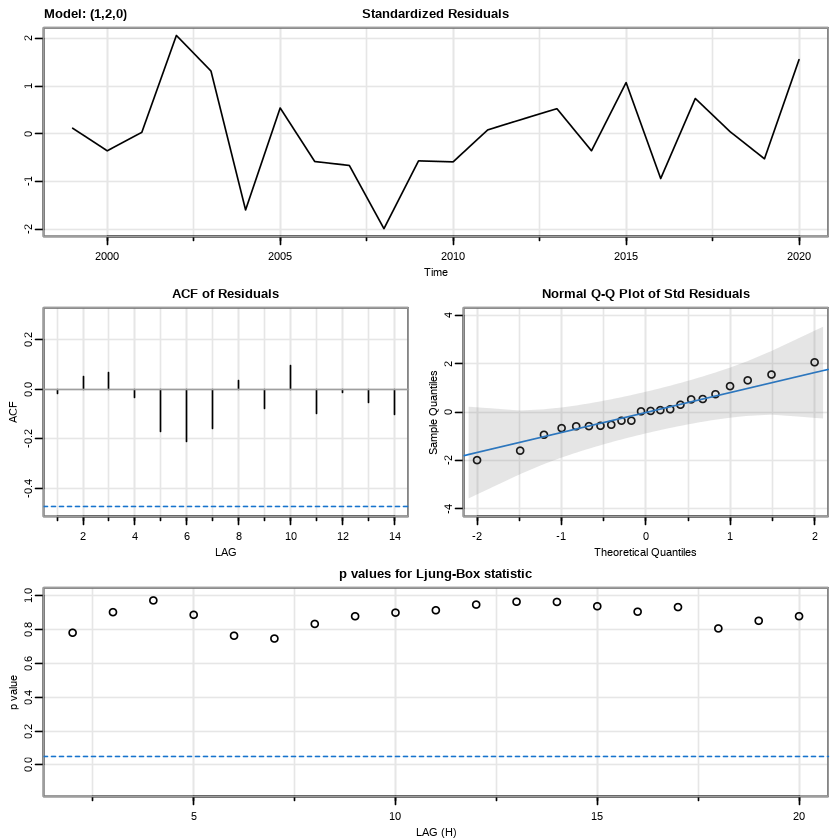

In [111]:
sarima(students.ts[,2], p = 1, d = 2, q = 0)

- **잔차는 백색잡음을 만족**

In [114]:
auto.arima(students.ts[,2])

Series: students.ts[, 2] 
ARIMA(1,2,0) 

Coefficients:
         ar1
      0.3861
s.e.  0.2075

sigma^2 = 1.174e+09:  log likelihood = -236.71
AIC=477.42   AICc=478.12   BIC=479.41

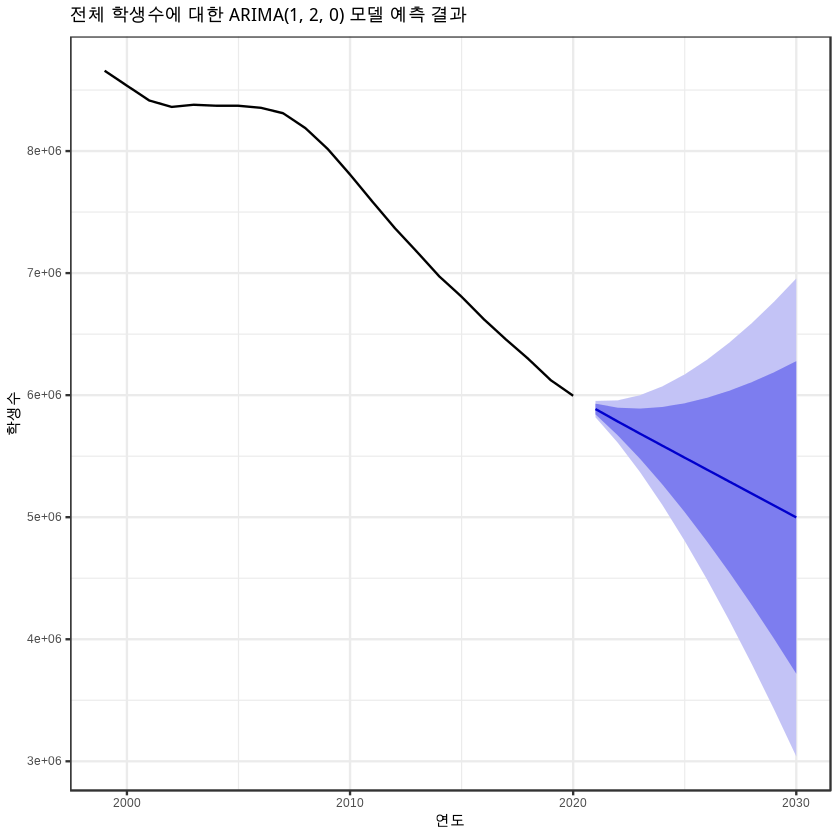

In [115]:
auto.arima(students.ts[,2]) %>% forecast() %>%
  autoplot() +
  labs(title = '전체 학생수에 대한 ARIMA(1, 2, 0) 모델 예측 결과', x = '연도', y = '학생수')

### ARIMA 모델 2

In [116]:
urca::ur.kpss(covid19.ts[,2]) %>% urca::summary()


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 3.2656 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


In [117]:
# 비정상성을 제거하기 위해 필요한 차분수가 1
ndiffs(covid19.ts[,2], test = 'kpss')

[1] 1

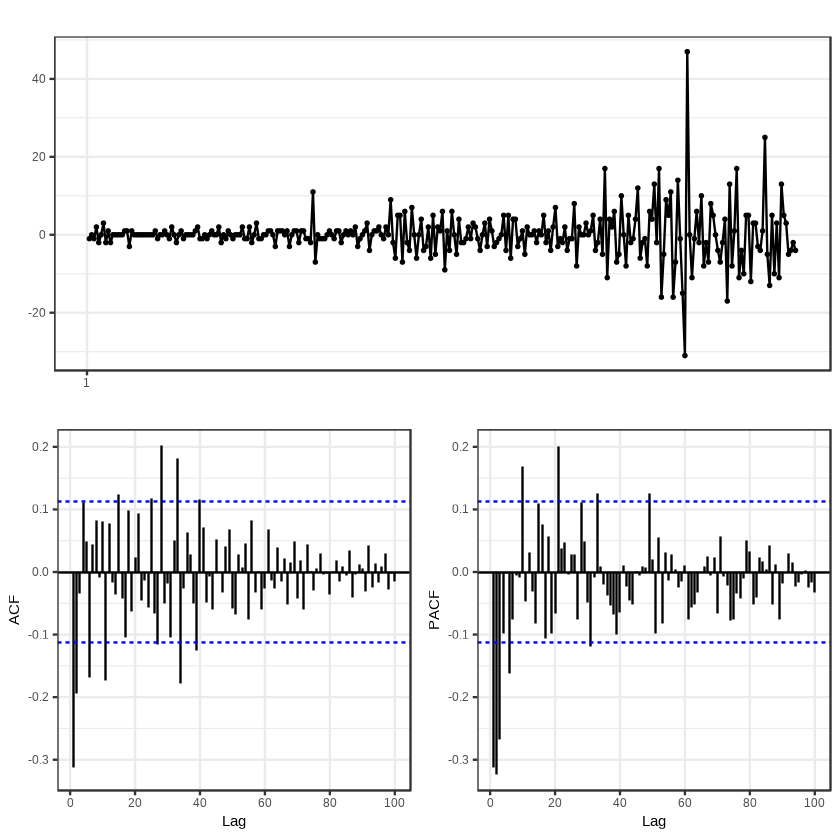

In [118]:
# ACF, PACF 모두 절단(cut off)이므로 ARMA(p, q) 모델
diff(covid19.ts[,2]) %>% ggtsdisplay()

In [119]:
# 0-9세 코로나 확진자수의 ARIMA 모형은 ARIMA(2, 1, 1)으로 선정됨
auto.arima(covid19.ts[,2])

Series: covid19.ts[, 2] 
ARIMA(2,1,1) 

Coefficients:
         ar1      ar2      ma1
      0.1126  -0.1775  -0.6535
s.e.  0.0868   0.0688   0.0726

sigma^2 = 26.74:  log likelihood = -920.47
AIC=1848.93   AICc=1849.07   BIC=1863.76

initial  value 1.793862 
iter   2 value 1.678611
iter   3 value 1.660151
iter   4 value 1.655522
iter   5 value 1.643145
iter   6 value 1.641880
iter   7 value 1.641239
iter   8 value 1.640877
iter   9 value 1.640615
iter  10 value 1.640567
iter  11 value 1.640564
iter  12 value 1.640564
iter  13 value 1.640564
iter  13 value 1.640564
iter  13 value 1.640564
final  value 1.640564 
converged
initial  value 1.638392 
iter   2 value 1.638388
iter   3 value 1.638387
iter   4 value 1.638387
iter   5 value 1.638387
iter   5 value 1.638387
iter   5 value 1.638387
final  value 1.638387 
converged


$fit

Call:
arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, Q), period = S), 
    xreg = constant, transform.pars = trans, fixed = fixed, optim.control = list(trace = trc, 
        REPORT = 1, reltol = tol))

Coefficients:
         ar1      ar2      ma1  constant
      0.1150  -0.1768  -0.6576    0.0631
s.e.  0.0866   0.0688   0.0723    0.0963

sigma^2 estimated as 26.43:  log likelihood = -920.25,  aic = 1850.51

$degrees_of_freedom
[1] 297

$ttable
         Estimate     SE t.value p.value
ar1        0.1150 0.0866  1.3287  0.1850
ar2       -0.1768 0.0688 -2.5694  0.0107
ma1       -0.6576 0.0723 -9.0980  0.0000
constant   0.0631 0.0963  0.6552  0.5128

$AIC
[1] 6.147873

$AICc
[1] 6.148322

$BIC
[1] 6.209453


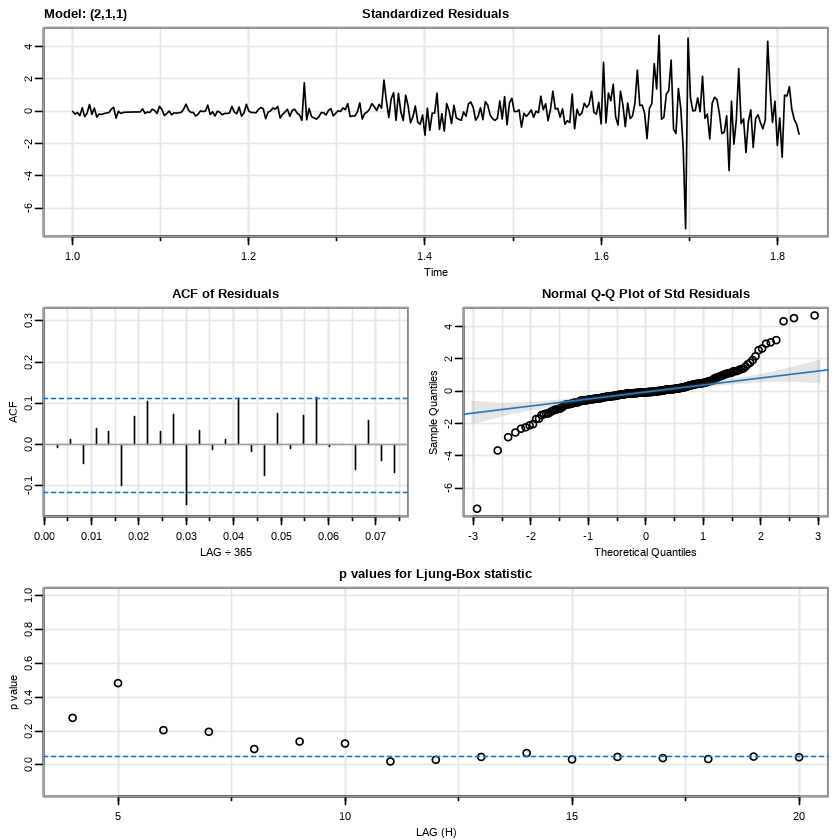

In [120]:
sarima(covid19.ts[,2], 2, 1, 1)

- **Ljung-box 검정 결과가 95% 임계치보다 크지 않음 => 잔차가 백색잡음 X**

## Seasonal ARIMA 모델 
### 계절성을 지니는 데이터는 ARIMA 모델로 모델링 어려움 => Seasonal ARIMA

### ARIMA(p, d, q)(P, D, Q)m
- **(P, D, Q) : 계절성 차수**
- **m** : 계절성 주기

In [123]:
# 전체 취업자수 데이터를 분기별 합계 데이터로 변환
employees %>% mutate(year = lubridate::year(time),
                     qtr = lubridate::quarter(time)) %>%
  group_by(year, qtr) %>%
  summarise(sum = sum(total)) %>%
  ts(frequency = 4, start = c(2013,1)) -> qtr.employees.ts

head(employees)
head(qtr.employees.ts)

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.


,time,total,employees.edu,date
,<date>,<int>,<int>,<yearmon>
1,2013-01-01,24287,1710,1 2013
2,2013-02-01,24215,1681,2 2013
3,2013-03-01,24736,1716,3 2013
4,2013-04-01,25322,1745,4 2013
5,2013-05-01,25610,1774,5 2013
6,2013-06-01,25686,1786,6 2013


,year,qtr,sum
2013 Q1,2013,1,73238
2013 Q2,2013,2,76618
2013 Q3,2013,3,76895
2013 Q4,2013,4,76841
2014 Q1,2014,1,75629
2014 Q2,2014,2,78275


In [124]:
# auto.arima로 일단 ARIMA 모형을 검토 - ARIMA(0,1,0)(0,1,0)[4]로 제안됨
auto.arima(qtr.employees.ts[,3]) %>% summary()

Series: qtr.employees.ts[, 3] 
ARIMA(0,1,0)(0,1,0)[4] 

sigma^2 = 240342:  log likelihood = -205.52
AIC=413.04   AICc=413.2   BIC=414.33

Training set error measures:
                   ME     RMSE      MAE        MPE      MAPE      MASE
Training set -119.056 450.3206 266.8772 -0.1506314 0.3348234 0.2848644
                   ACF1
Training set 0.02400751

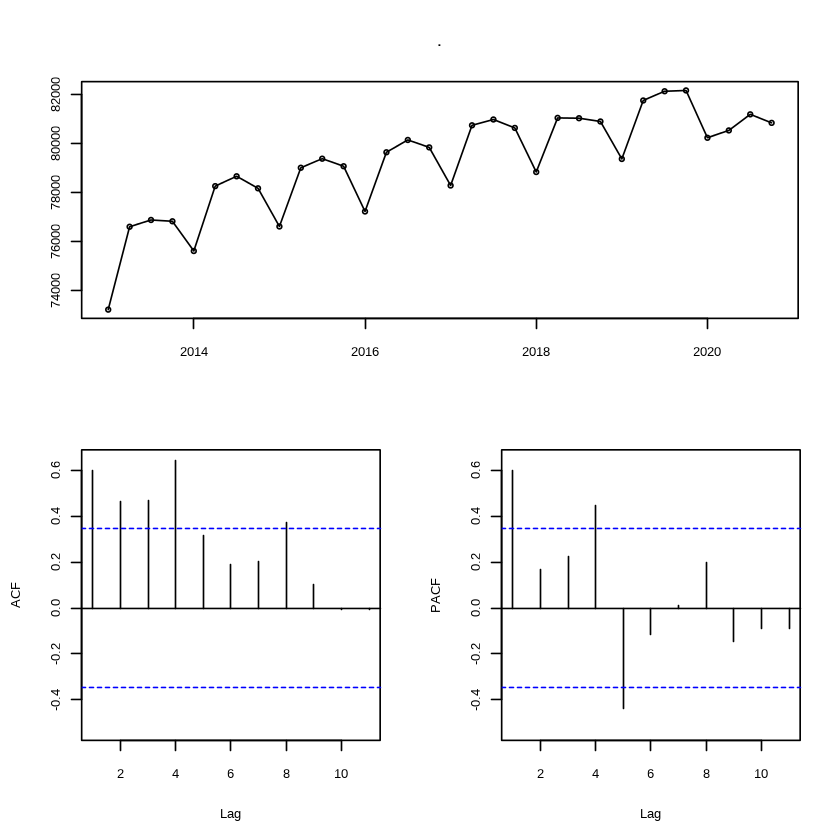

In [125]:
# ggtsdisplay()로 ACF 플롯을 볼 때 4주기마다 계절성이 있는 듯 보임
qtr.employees.ts[,3] %>% tsdisplay()

- **4주기마다 계절성 존재**

In [126]:
# KPSS 검정 결과 단위근이 존재하는 비정상성 데이터
qtr.employees.ts[,3] %>% urca::ur.kpss() %>% urca::summary()


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.8663 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


In [127]:
# ndiffs()에 의하면 1차 차분 필요
qtr.employees.ts[,3] %>% ndiffs()

[1] 1

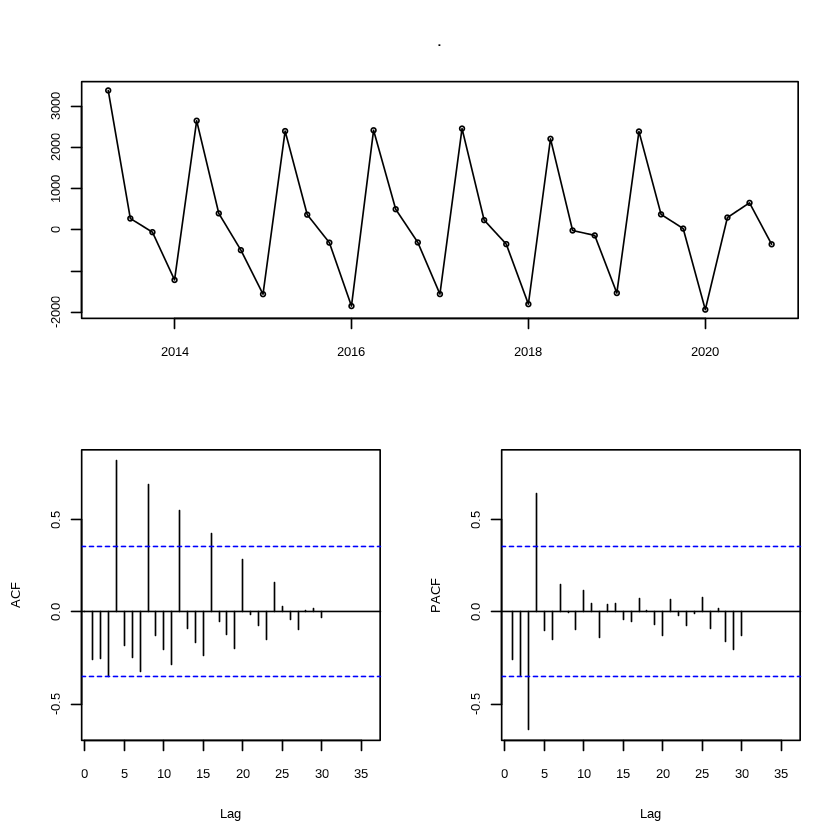

In [128]:
# 1차 차분 결과 plot()
qtr.employees.ts[,3] %>% diff() %>% tsdisplay(lag.max = 36)

- 1차 차분된 데이터의 ACF와 PACF의 비계절성 lag(1, 2, 3 등)는 대부분 임계치 아래로 내려가 있음 => ARMA(0, 0)로 결정 가능
- ACF선이 4주기별로 점차 감소하는 형태
- 계절성 주기 lag(4, 8, 12)를 보고 계절성 ARIMA 모형을 결정 => ACF에서 4주기별로 점차 감소, PACF에서는 lag4에서 절단 => ARMA(1, 0)[4] => ARIMA(0, 1, 0)(1, 1, 0)[4]

initial  value 6.201317 
iter   2 value 6.192952
iter   3 value 6.185212
iter   4 value 6.185187
iter   4 value 6.185187
final  value 6.185187 
converged
initial  value 6.179834 
iter   2 value 6.179786
iter   3 value 6.179732
iter   3 value 6.179732
iter   3 value 6.179732
final  value 6.179732 
converged


$fit

Call:
arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, Q), period = S), 
    include.mean = !no.constant, transform.pars = trans, fixed = fixed, optim.control = list(trace = trc, 
        REPORT = 1, reltol = tol))

Coefficients:
         sar1
      -0.2955
s.e.   0.3359

sigma^2 estimated as 230020:  log likelihood = -205.16,  aic = 414.33

$degrees_of_freedom
[1] 26

$ttable
     Estimate     SE t.value p.value
sar1  -0.2955 0.3359 -0.8799   0.387

$AIC
[1] 15.34549

$AICc
[1] 15.35141

$BIC
[1] 15.44148


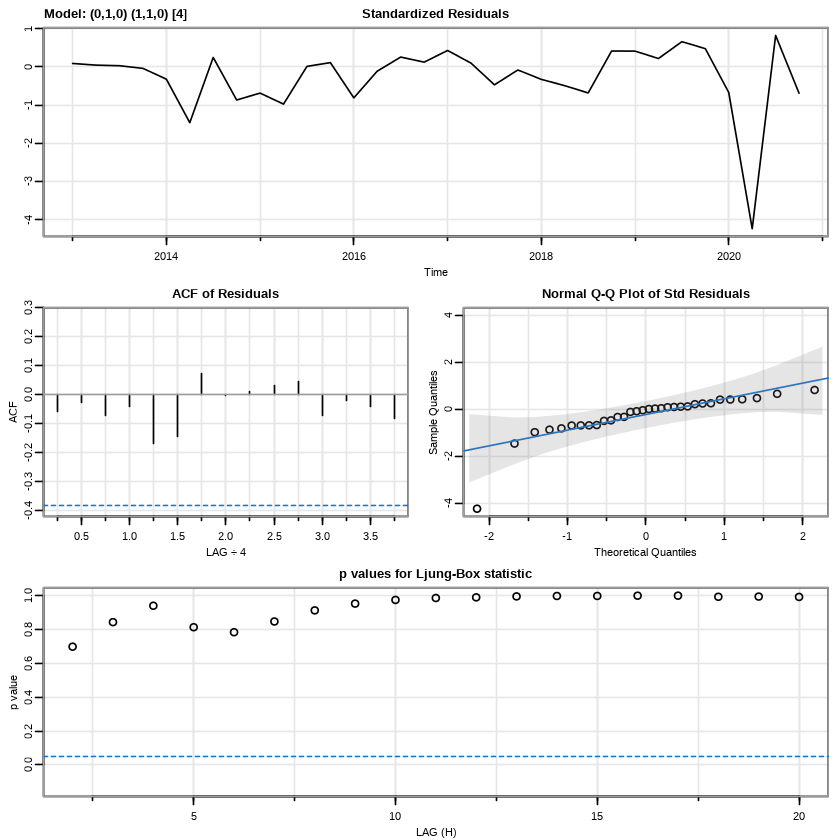

In [129]:
# 잔차의 분포, ACF, Q-Q 플롯, Ljung-box test 모두 백색잡음으로 나타남
sarima(qtr.employees.ts[,3], p = 0, d = 1, q = 0, P = 1, D = 1, Q = 0, S = 4)

In [130]:
auto.arima(qtr.employees.ts[,3])

Series: qtr.employees.ts[, 3] 
ARIMA(0,1,0)(0,1,0)[4] 

sigma^2 = 240342:  log likelihood = -205.52
AIC=413.04   AICc=413.2   BIC=414.33

$fit

Call:
arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, Q), period = S), 
    include.mean = !no.constant, transform.pars = trans, fixed = fixed, optim.control = list(trace = trc, 
        REPORT = 1, reltol = tol))


sigma^2 estimated as 239349:  log likelihood = -205.52,  aic = 413.04

$degrees_of_freedom
[1] 27

$ttable
     Estimate p.value

$AIC
[1] 15.29763

$AICc
[1] 15.29763

$BIC
[1] 15.34562


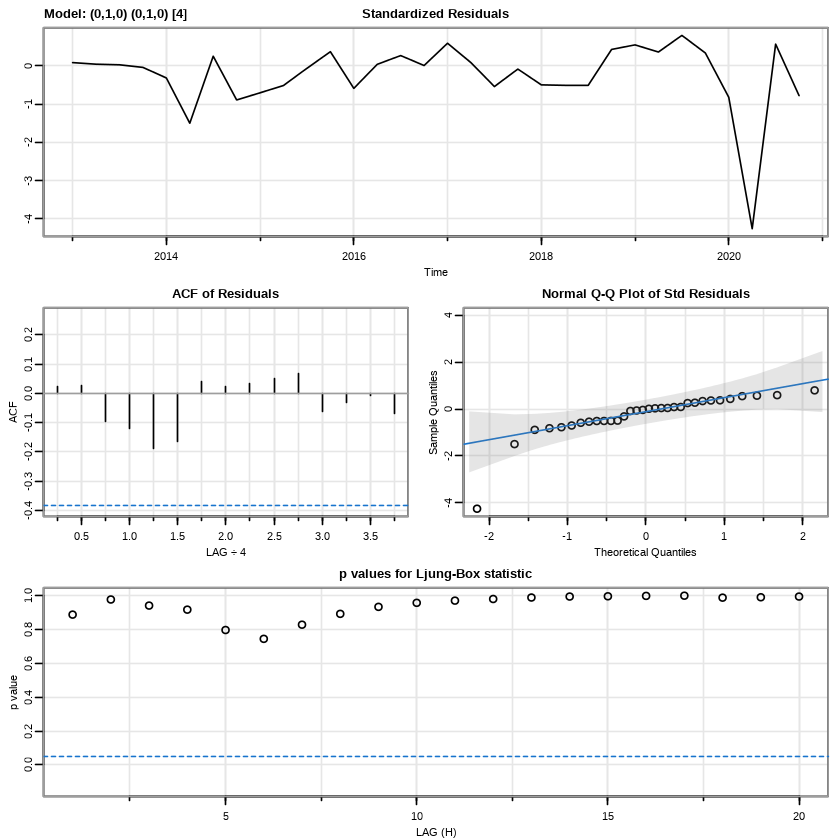

In [131]:
sarima(qtr.employees.ts[,3], p = 0, d = 1, q = 0, P = 0, D = 1, Q = 0, S = 4)

### Seasonal ARIMA 모델 1

In [135]:
# 신규취업자수에 대한 수작업 모델과 auto.arima모델을 생성
arima010110 <- Arima(qtr.employees.ts[,3], order = c(0,1,0), seasonal = c(1,1,0))
arima010010 <- Arima(qtr.employees.ts[,3], order = c(0,1,0), seasonal = c(0,1,0))

In [139]:
# 각 모델의 회귀 계수 및 다양한 정보
summary(arima010110)
summary(arima010010)

Series: qtr.employees.ts[, 3] 
ARIMA(0,1,0)(1,1,0)[4] 

Coefficients:
         sar1
      -0.2955
s.e.   0.3359

sigma^2 = 239898:  log likelihood = -205.16
AIC=414.33   AICc=414.83   BIC=416.92

Training set error measures:
                    ME     RMSE      MAE        MPE      MAPE    MASE
Training set -127.5149 441.4946 260.5119 -0.1615043 0.3268788 0.27807
                    ACF1
Training set -0.05923251

Series: qtr.employees.ts[, 3] 
ARIMA(0,1,0)(0,1,0)[4] 

sigma^2 = 240342:  log likelihood = -205.52
AIC=413.04   AICc=413.2   BIC=414.33

Training set error measures:
                   ME     RMSE      MAE        MPE      MAPE      MASE
Training set -119.056 450.3206 266.8772 -0.1506314 0.3348234 0.2848644
                   ACF1
Training set 0.02400751

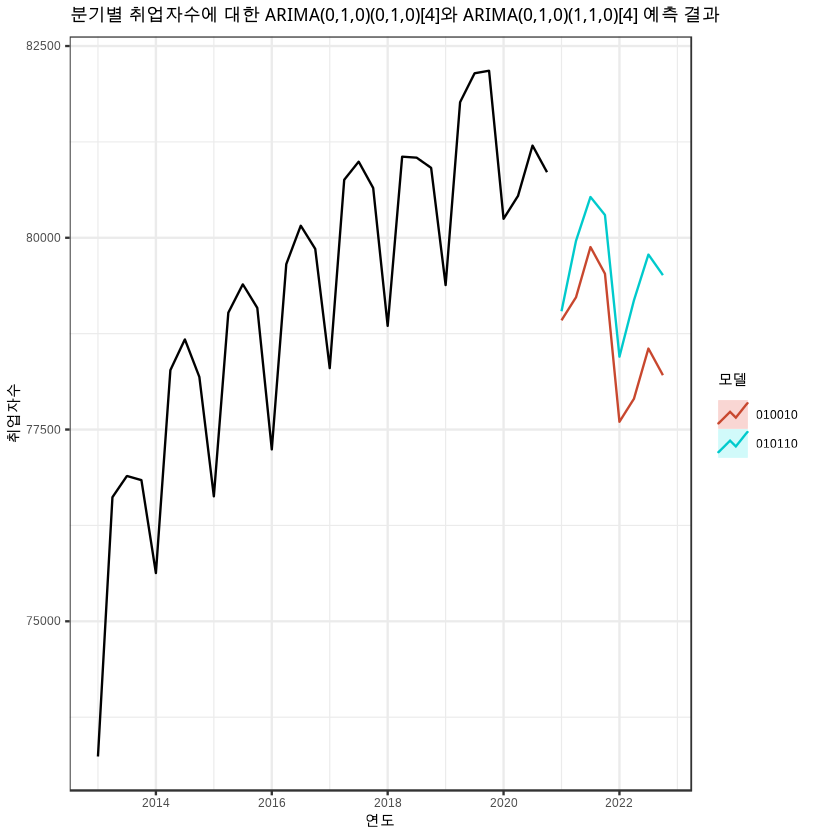

In [138]:
# 각 모델의 예측값 산출
forecast010110 <- arima010110 %>% forecast()
forecast010010 <- arima010010 %>% forecast()

autoplot(qtr.employees.ts[,3]) +
  autolayer(forecast010110, PI = F, series = '010110') +
  autolayer(forecast010010, PI = F, series = '010010') +
  labs(title = '분기별 취업자수에 대한 ARIMA(0,1,0)(0,1,0)[4]와 ARIMA(0,1,0)(1,1,0)[4] 예측 결과',
       x = '연도', y = '취업자수', color = '모델')

In [140]:
# auto.arima()는 ARIMA(0,1,0)(0,1,1)[12] 모델 제안
employees.ts[,2] %>% auto.arima()

Series: . 
ARIMA(0,1,0)(0,1,1)[12] 

Coefficients:
         sma1
      -0.4246
s.e.   0.1648

sigma^2 = 15320:  log likelihood = -518.14
AIC=1040.27   AICc=1040.42   BIC=1045.11

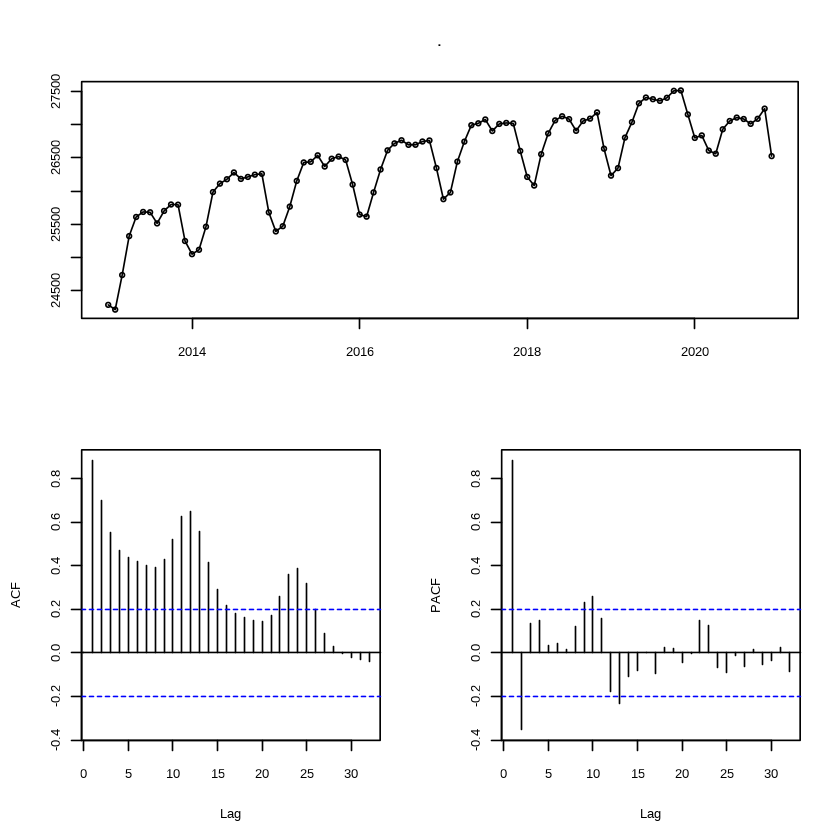

In [141]:
# ggtsdisplay()로 ACF 플롯을 볼 때 12주기마다 계절성이 있는 듯 보임
employees.ts[,2] %>% tsdisplay()

In [142]:
# KPSS 검정 결과 단위근이 존재하는 비정상성 데이터
employees.ts[,2] %>% urca::ur.kpss() %>% urca::summary()

# ndiffs()에 의하면 1차 차분 필요
employees.ts[,2] %>% ndiffs()


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 1.9226 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


[1] 1

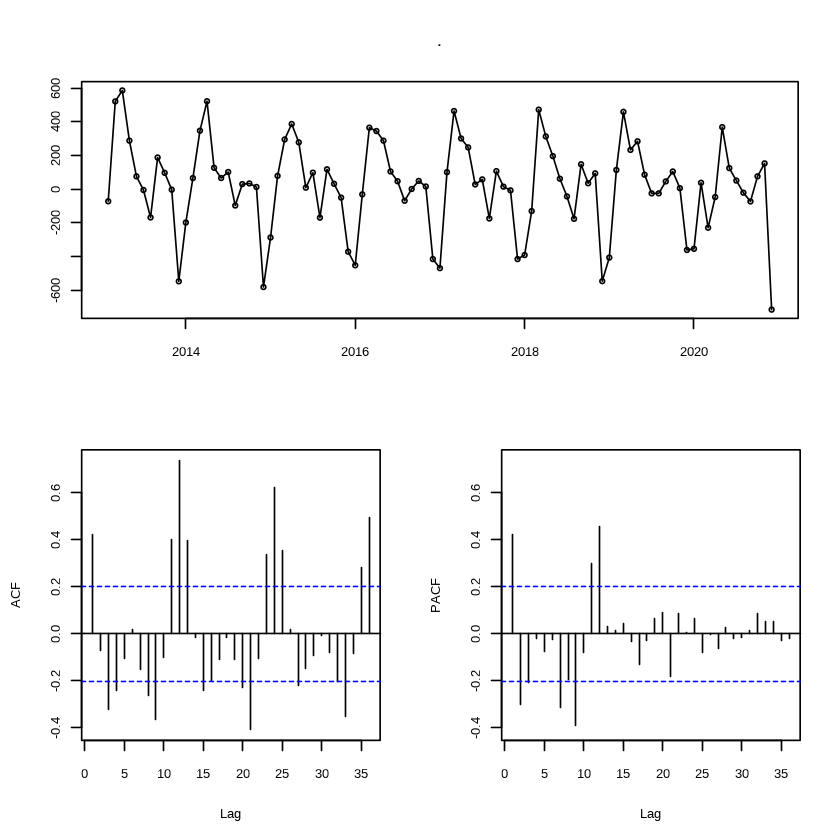

In [143]:
# 1차 차분 결과 plot()
# ACF, PACF를 확인해서 비계절성 모델은 (0,1,1), 계절성 모델은 (1,1,0)으로 결정
employees.ts[,2] %>% diff() %>% tsdisplay(lag.max = 36)

In [145]:
# ARIMA(0,1,1)(1,1,0)[12]모델 생성
arima011110 <- employees.ts[,2] %>% Arima(order = c(0,1,1), seasonal = c(1,1,0))

# auto.arima()가 제안한 ARIMA(0,1,0)(0,1,1)[12]모델 생성
arima010011 <- employees.ts[,2] %>% Arima(order = c(0,1,0), seasonal = c(0,1,1))

In [146]:
# 각 모델의 정보 확인
summary(arima011110)
summary(arima010011)

Series: . 
ARIMA(0,1,1)(1,1,0)[12] 

Coefficients:
         ma1     sar1
      0.0087  -0.3649
s.e.  0.1385   0.1395

sigma^2 = 15667:  log likelihood = -518.22
AIC=1042.45   AICc=1042.75   BIC=1049.7

Training set error measures:
                    ME    RMSE      MAE         MPE      MAPE      MASE
Training set -15.58899 114.974 74.83796 -0.05996543 0.2828592 0.2361174
                    ACF1
Training set -0.02801497

Series: . 
ARIMA(0,1,0)(0,1,1)[12] 

Coefficients:
         sma1
      -0.4246
s.e.   0.1648

sigma^2 = 15320:  log likelihood = -518.14
AIC=1040.27   AICc=1040.42   BIC=1045.11

Training set error measures:
                    ME     RMSE      MAE         MPE      MAPE      MASE
Training set -17.24831 114.3934 73.75538 -0.06622242 0.2787589 0.2327018
                    ACF1
Training set -0.01264952

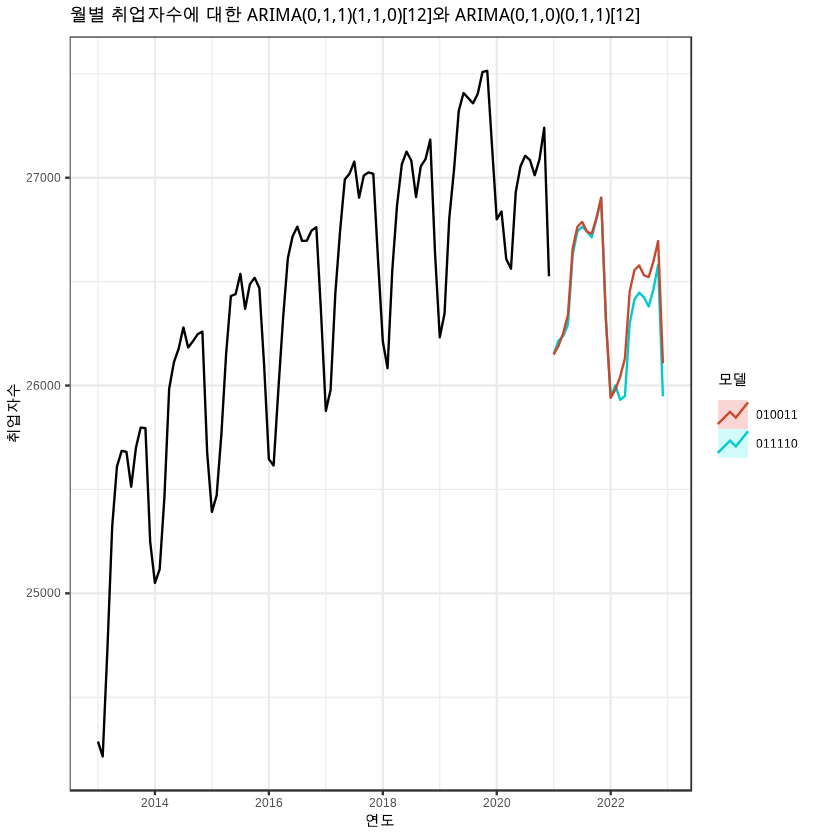

In [147]:
# 두 모델의 예측값 산출
forecast011110 <- arima011110 %>% forecast()
forecast010011 <- arima010011 %>% forecast()

# 두 모델의 플롯
autoplot(employees.ts[,2]) +
  autolayer(forecast011110, PI = F, series = '011110') +
  autolayer(forecast010011, PI = F, series = '010011') +
  labs(title = '월별 취업자수에 대한 ARIMA(0,1,1)(1,1,0)[12]와 ARIMA(0,1,0)(0,1,1)[12]', x =
         '연도', y = '취업자수', color = '모델')

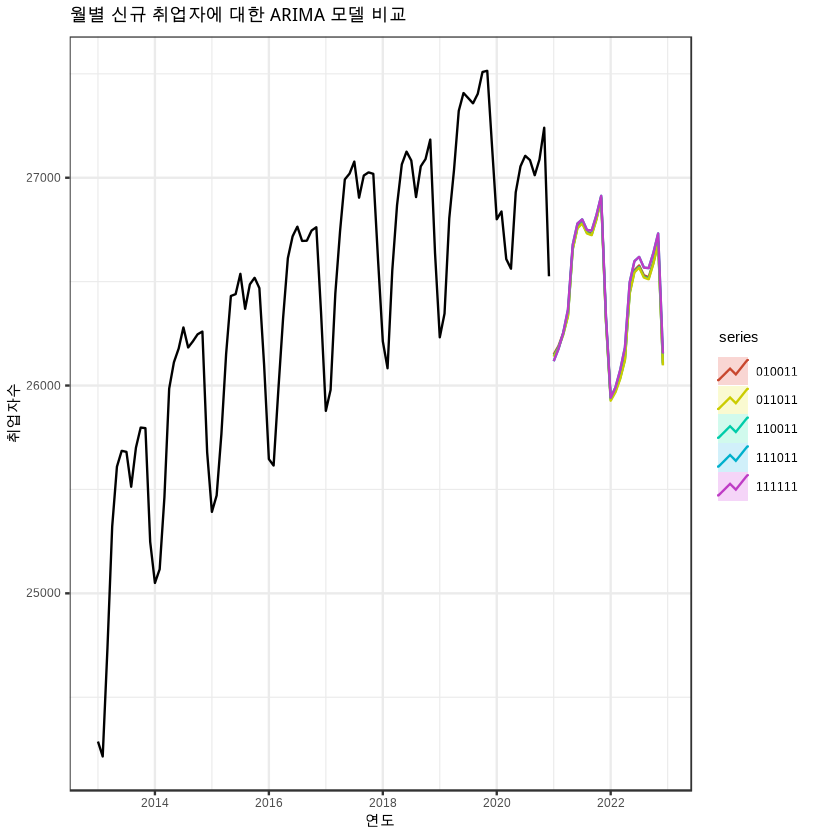

In [148]:
autoplot(employees.ts[, 2]) +
  autolayer(forecast010011, PI = F, series = '010011') +
  autolayer(forecast(Arima(employees.ts[, 2], order = c(1,1,0), seasonal = c(0,1,1))),
            PI = F, series = '110011') +
  autolayer(forecast(Arima(employees.ts[, 2], order = c(0,1,1), seasonal = c(0,1,1))),
            PI = F, series = '011011') +
  autolayer(forecast(Arima(employees.ts[, 2], order = c(1,1,1), seasonal = c(0,1,1))),
            PI = F, series = '111011') +
  autolayer(forecast(Arima(employees.ts[, 2], order = c(1,1,1), seasonal = c(1,1,1))),
            PI = F, series = '111111') +
  labs(title = '월별 신규 취업자에 대한 ARIMA 모델 비교', x = '연도', y = '취업자수')

## TBATS 모델 : 다중 계절성 처리
- 짧은 주기의 계절성을 찾아내는 모델이나 변동성을 지니는 계절성 데이터에 대해 모델을 구축
- 계절성의 삼각함수, Box-Cox변환, ARMA 에러, 추세와 계절성 컴포넌트의 요소를 활용한 지수 평활 상태 공간 모델

### ```tbats()```

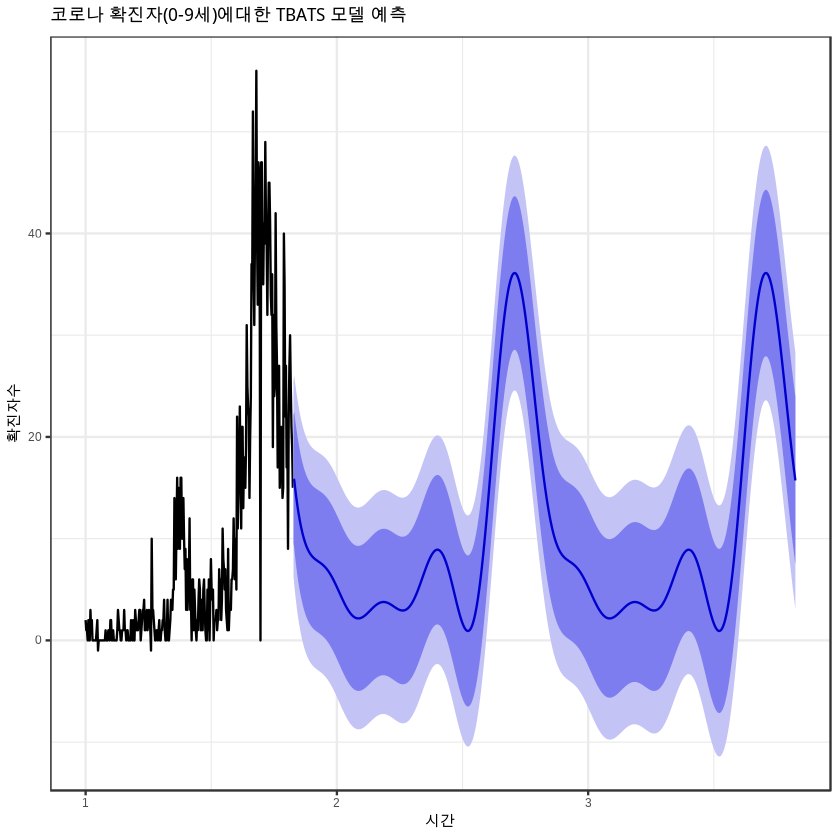

In [149]:
# 코로나 확진자 데이터에 대한 tBats 모델
covid19.ts[,2] %>% tbats() %>% forecast() %>% 
    autoplot() + 
    labs(title = '코로나 확진자(0-9세)에대한 TBATS 모델 예측', x = '시간', y = '확진자수')

## Prophet 모델 
- 시계열 데이터를 추세(t), 계절성(s), 휴일(h), 오차(e)의 네 가지 특성으로 분리
- 추세(t) : 반복이 되지 않는 추세
- 계절성(s) : 계절과 같은 반복적인 변화
- 휴일(h) : 공휴일과 같이 달력상의 불규칙한 특성
- 오차 : 정규분포를 따른 ㄴ오차

### ARIMA 모델처럼 시계열 데이터의 구조 간의 관게를 분석하는 모델과 달리, 어떻게든 적합한 커브를 그리는데 목표
- 여러 주기를 가지는 계절성에 쉽게 사용
- 데이터 주기를 맞추기 위해 데이터를 채워 넣는 작업을 피함
- 빠르게 다양한 모델 스펙 사용 가능
- 다양한 매개변수

### 데이터 프레임 객체를 대상
#### - **데이터 프레임에는 반드시 열 이름이 "ds"와 "y"로 설정된 두 개의 데이터 필드가 필요**
##### - "ds"칼럼은 date 데이터 타입, y 칼럼은 수치 데이터 타입
#### - 미래 예측값을 저장할 데이터 프레임을 미리 생성

In [151]:
library(prophet)

In [152]:
students.prophet <- data.frame(ds = students$연도, y = students$학생수계)
head(students.prophet)

,ds,y
,<date>,<dbl>
1,1999-01-01,8658358
2,2000-01-01,8535867
3,2001-01-01,8414423
4,2002-01-01,8361933
5,2003-01-01,8379775
6,2004-01-01,8371630


### ```prophet::prophet()``` : prophet 모형 적합
- ```yearly.seasonality``` : auto / TRUE / FALSE
- ```weekly.seasonality``` : auto / TRUE / FALSE
- ```daily.seasonality``` : auto / TRUE / FALSE

In [153]:
model.prophet.students <- prophet::prophet(students.prophet)

Disabling weekly seasonality. Run prophet with weekly.seasonality=TRUE to override this.

Disabling daily seasonality. Run prophet with daily.seasonality=TRUE to override this.

n.changepoints greater than number of observations. Using 16



### ```prophet::make_futre_dataframe()```: 미래 예측값을 저장할 데이터 프레임 생성

In [158]:
future.students <- make_future_dataframe(model.prophet.students, periods = 10, freq = 'year')

### ```predict( prophet모델,  future데이터프레임  )``` : 예측

In [159]:
forecast.students <- predict(model.prophet.students, future.students)

Warning message:
"Removed 10 rows containing missing values (geom_text_repel)."
Warning message:
"ggrepel: 5 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


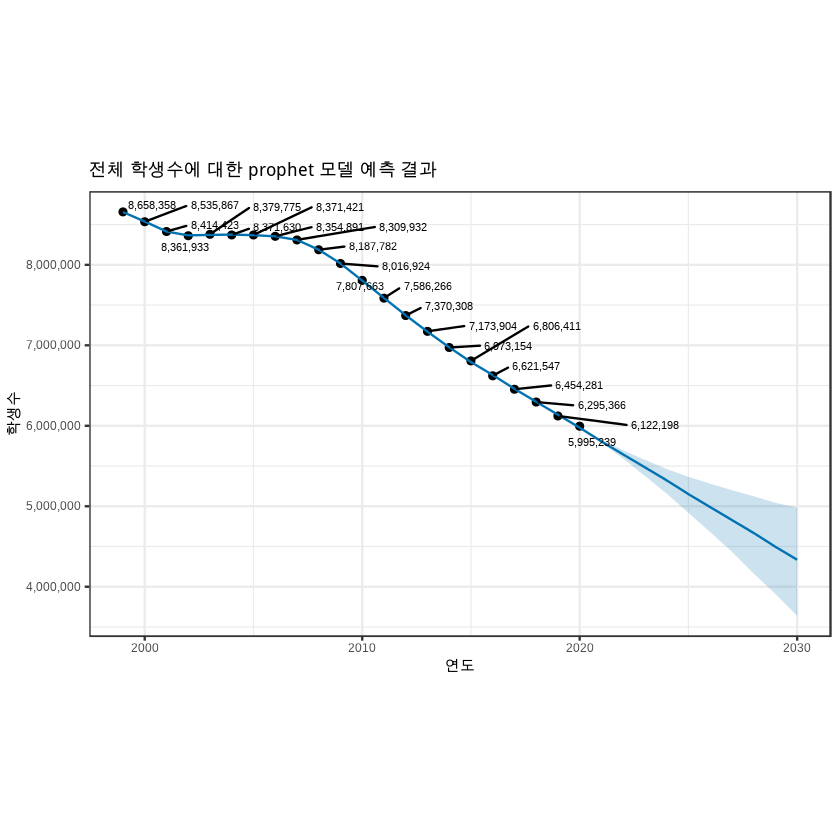

In [160]:
plot(model.prophet.students, forecast.students) +
  ggrepel::geom_text_repel(aes(label = scales::number(y, big.mark = ',', accuracy = 1)),
                           vjust = 1, size = 3) +
  labs(title = '전체 학생수에 대한 prophet 모델 예측 결과', x = '연도', y = '학생수') +
  scale_y_continuous(labels = scales::number_format(big.mark = ','))

### ```prophet::prophet_plot_component()``` : prophet 모델로 분해된 특성들에 대한 플롯 확인

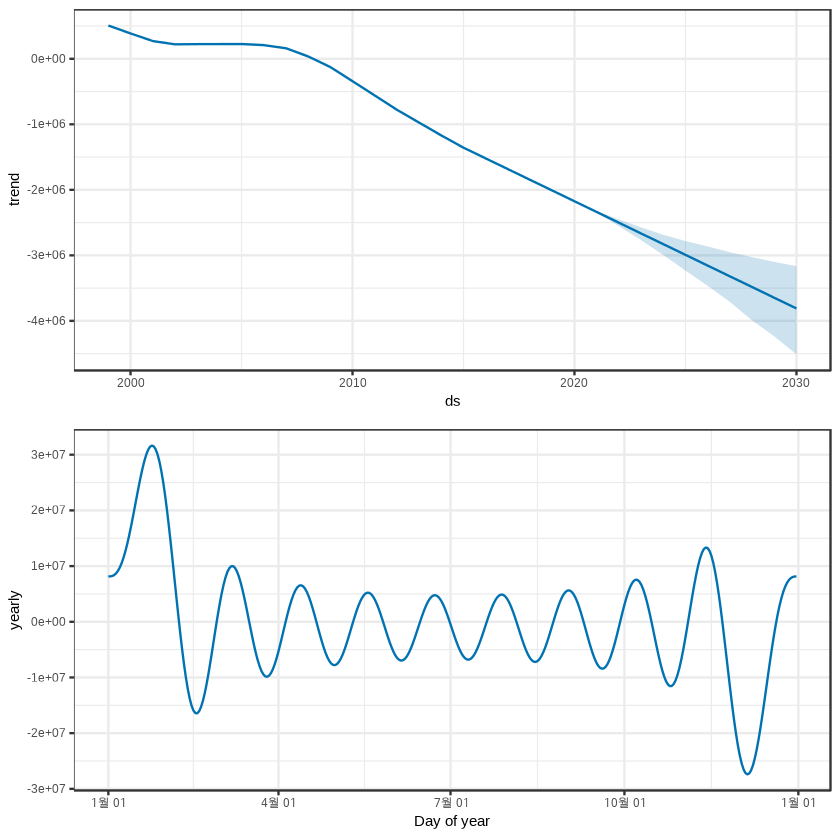

In [161]:
prophet_plot_components(model.prophet.students, forecast.students)

### prophet 모델 1

Disabling weekly seasonality. Run prophet with weekly.seasonality=TRUE to override this.

Disabling daily seasonality. Run prophet with daily.seasonality=TRUE to override this.



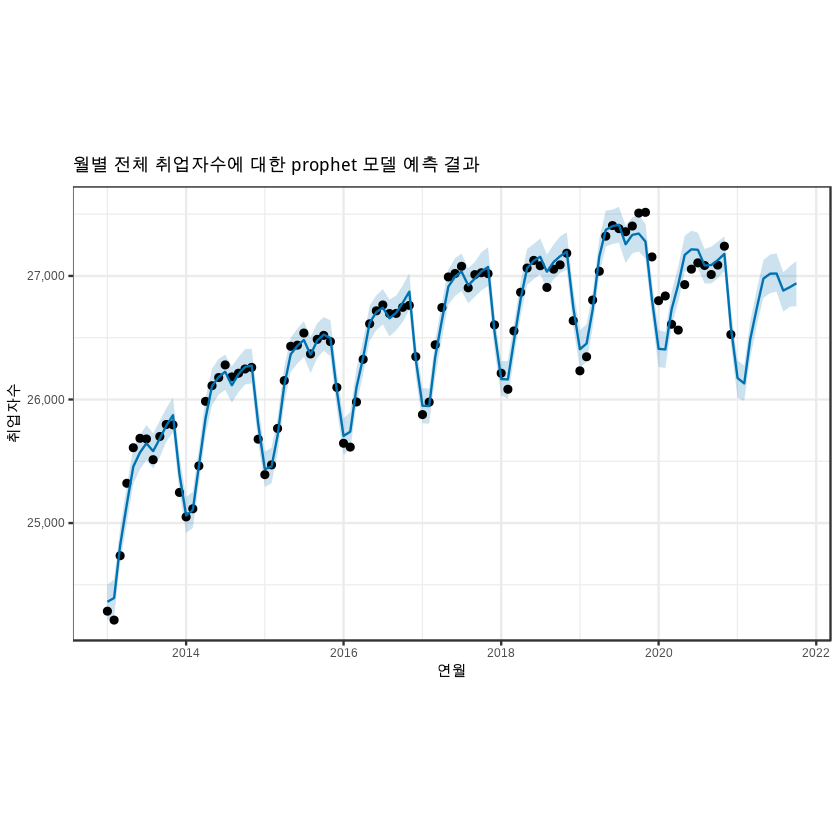

In [162]:
employees.prophet <- data.frame(ds = employees[,1], y = employees[,2])
model.prophet.employees <- prophet::prophet(employees.prophet)
future.employees <- make_future_dataframe(model.prophet.employees, periods = 10, freq = 'month')
forecast.employees <- predict(model.prophet.employees, future.employees)
plot(model.prophet.employees, forecast.employees) +
  labs(title = '월별 전체 취업자수에 대한 prophet 모델 예측 결과', x = '연월', y = '취업자수') +
  scale_y_continuous(labels = scales::number_format(big.mark = ','))

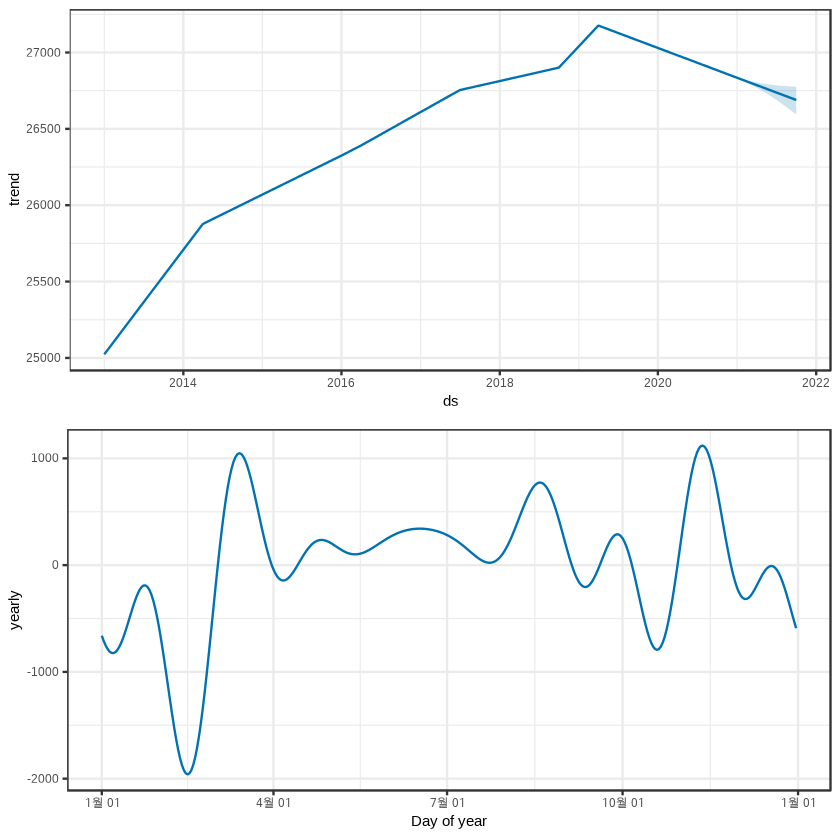

In [163]:
prophet_plot_components(model.prophet.employees, forecast.employees)

### prophet 모델 2

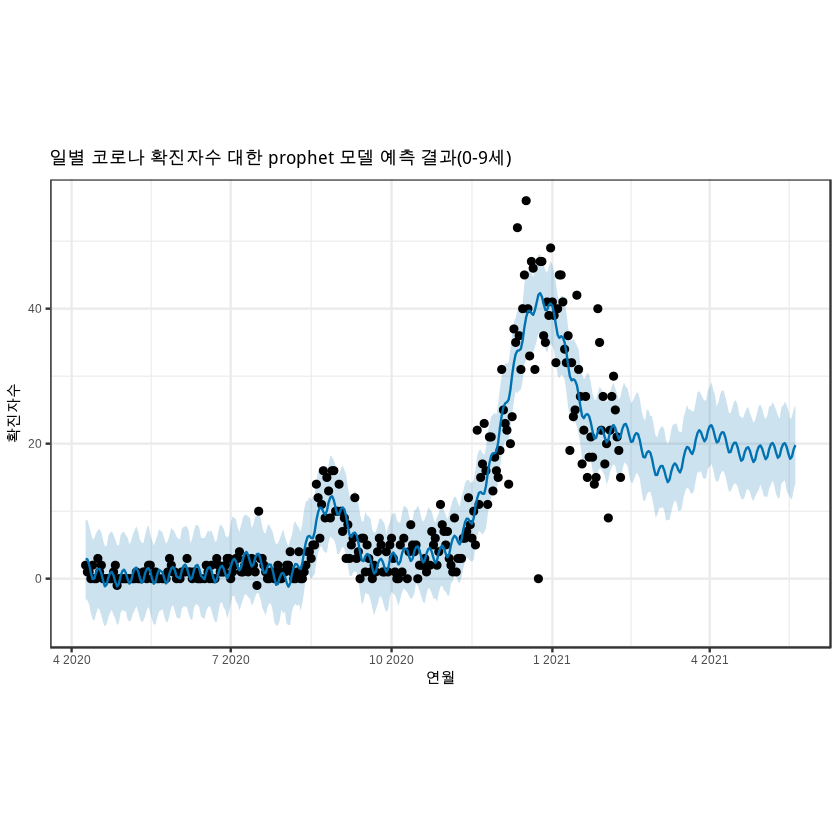

In [164]:
covid.prophet <- data.frame(ds = covid19$date, y = covid19$`0-9세`)
model.prophet.covid <- prophet::prophet(covid.prophet, 
                                        yearly.seasonality=TRUE, daily.seasonality=TRUE, weekly.seasonality=TRUE)
future.covid <- make_future_dataframe(model.prophet.covid, periods = 100, freq = 'day')
forecast.covid <- predict(model.prophet.covid, future.covid)
plot(model.prophet.covid, forecast.covid) +
  labs(title = '일별 코로나 확진자수 대한 prophet 모델 예측 결과(0-9세)', x = '연월', y = '확진자수') +
  scale_y_continuous(labels = scales::number_format(big.mark = ','))

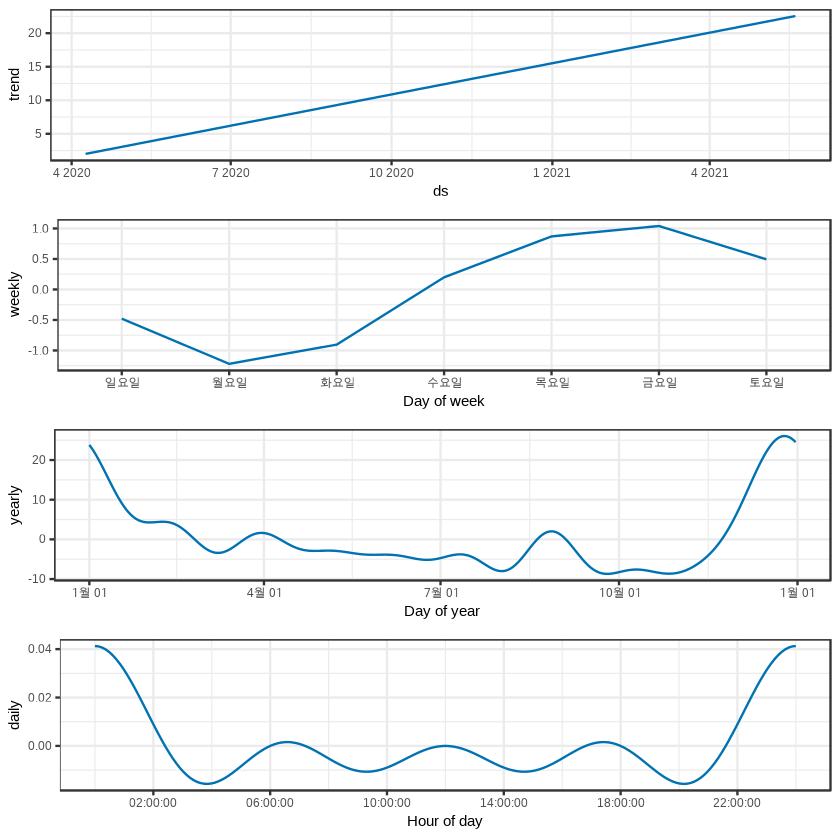

In [165]:
prophet_plot_components(model.prophet.covid, forecast.covid)

## 신경망 모델

### ```forecast::nnetar()``` : 싱글 은닉층을 사용한 신경망

### 계절성이 없는 경우 NNAR(p, k) / 계절성이 있는 경우 NNAR(p, P, k)[m]
#### - p : 은닉층에서 예측값을 산출하기 위해 사용하는 과거 데이터 개수
#### - k : 은닉층에 존재하는 셀의 개수
#### - P : 계절성에 대한 lag 값
#### - nnestar()는 p와 P값을 자동으로 산정, k = (p + P + 1) / 2로 설정
#### - NNAR모델의 단점 : 예측 구간의 계산이 원활하지 못함, => **forecast()함수에서 "PI = TRUE" 설정**

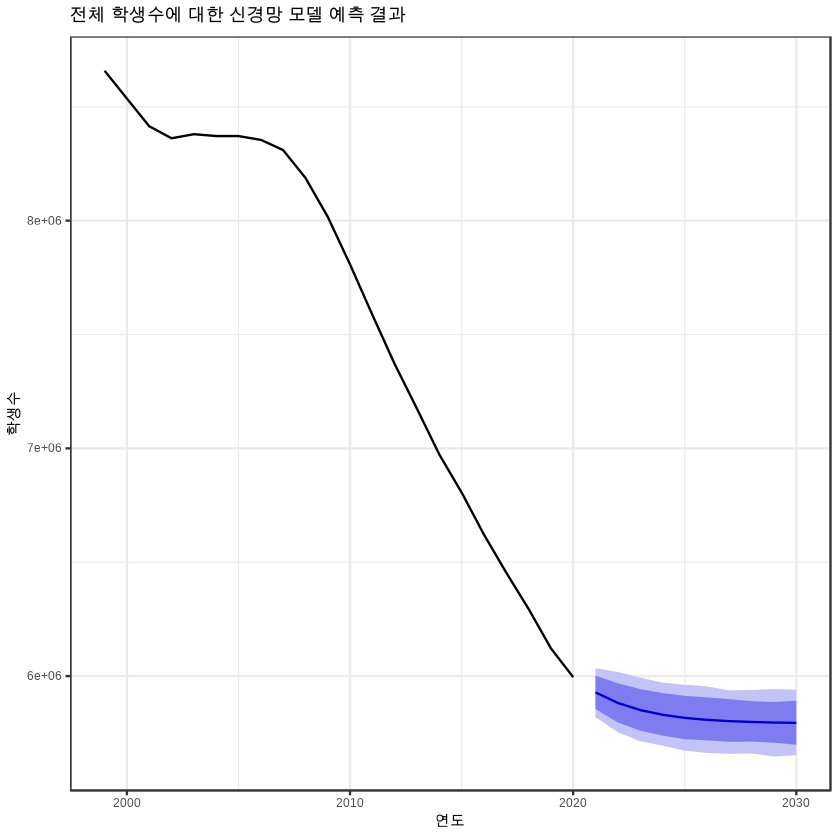

In [168]:
# 학생수에 대한 NNAR 모델은 NNAR(1, 1)모델
students.ts[,2] %>% nnetar() %>% forecast(PI = TRUE) %>% 
    autoplot() + 
    labs(title = '전체 학생수에 대한 신경망 모델 예측 결과', x = '연도', y = '학생수')

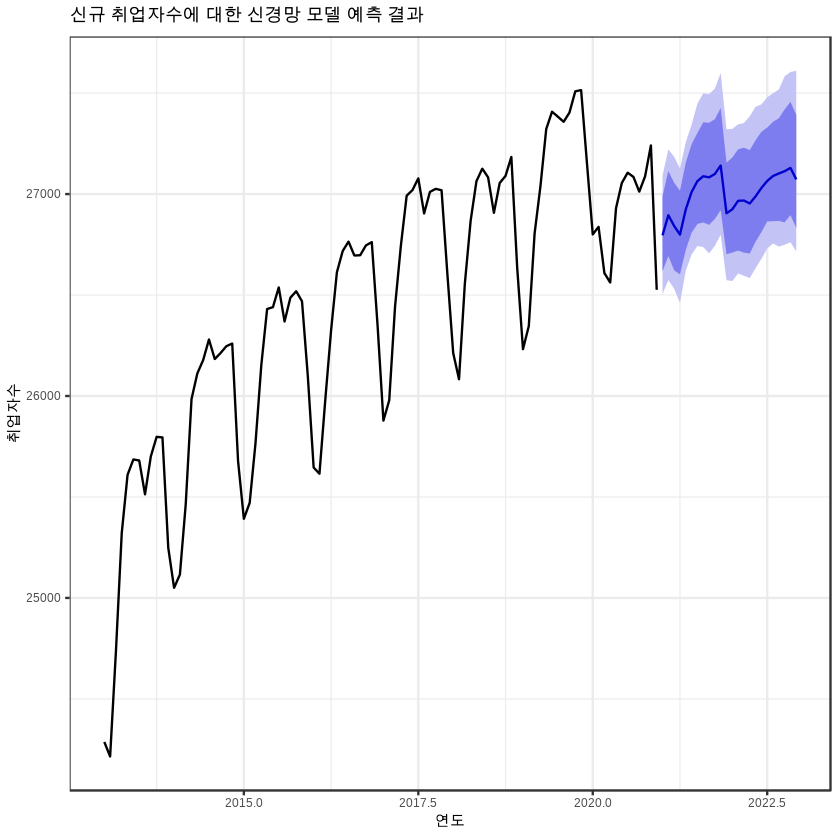

In [169]:
# 전체 취업자수에 대한 모델은 NNAR(1, 1, 2)[12] 모델
employees.ts[, 2] %>% nnetar() %>% forecast(PI = TRUE) %>% 
    autoplot() + 
    labs(title = '신규 취업자수에 대한 신경망 모델 예측 결과', x = '연도', y = '취업자수')

Warning message in nnetar(.):
"Series too short for seasonal lags"


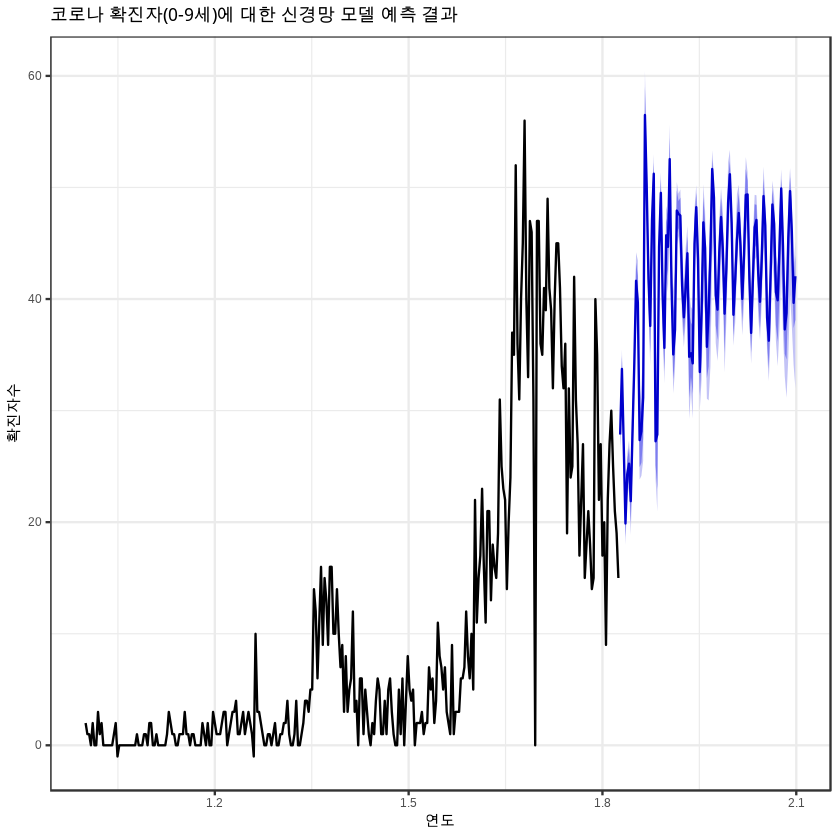

In [170]:
# 코로나 확진자수에 대한 모델은 NNAR(22, 12) 모델(예측값을 위해 22개의 과거 데이터를 활용했고 히든 레이어에 12개의 신경세포를 생성)
covid19.ts[,2] %>% nnetar() %>% forecast(h = 100, PI = TRUE) %>% 
    autoplot() + 
    labs(title = '코로나 확진자(0-9세)에 대한 신경망 모델 예측 결과', x = '연도', y = '확진자수')